# Deep neural network

In this notebook we will try to train a deep neural network model to identify cats in images.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import log_loss, f1_score, accuracy_score

from utils.data_utils import load_cat_data

from deep_nn import DeepNNModel

## Load dataset

In this notebook we will use a cats vs no-cat dataset available on [Kaggle](https://www.kaggle.com/).

In [3]:
# Load data
train_x_orig, train_y, test_x_orig, test_y, classes = load_cat_data()

In [4]:
# Check datashapes
print(f'Shape of X_train: {train_x_orig.shape}')
print(f'Shape of y_train: {train_y.shape}')
print(f'Shape of X_test: {test_x_orig.shape}')
print(f'Shape of y_test: {test_y.shape}')

Shape of X_train: (209, 64, 64, 3)
Shape of y_train: (1, 209)
Shape of X_test: (50, 64, 64, 3)
Shape of y_test: (1, 50)


Let's have a look at some images in the data

y = 1. It's a cat picture.


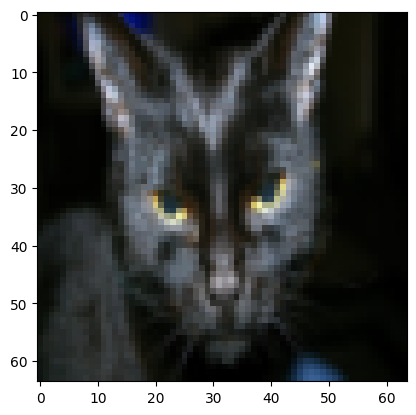

In [5]:
# Example of a picture
idx = 25
plt.imshow(train_x_orig[idx])
print (f"y = {str(train_y[0, idx])}. It's a {classes[train_y[0, idx]].decode('utf-8')} picture.")

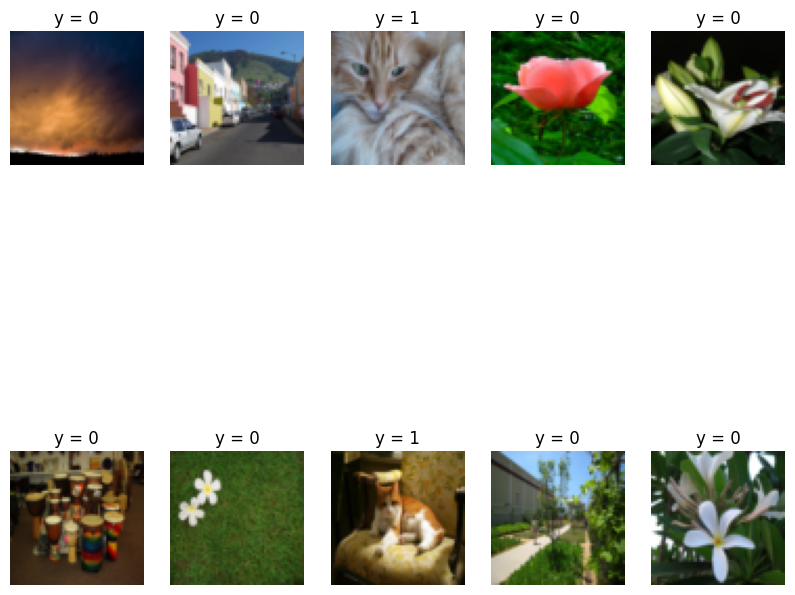

In [6]:
# Plot 10 first images in training set
plt.figure(figsize=(10, 10))
for i in range(10):
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(train_x_orig[i])
    plt.title(f'y = {str(train_y[0, i])}')
    plt.axis("off")

## Process data

We start by flatten our data into arrays on format `(nr_pixels, nr_examples)` and standardize by dividing by `255.0`.

In [7]:
# Reshape train and test data
X_train_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T
X_test_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize features
X_train = X_train_flatten / 255.0
X_test = X_test_flatten / 255.0

In [8]:
# Shapes of flattened data
print(f'Training data shape: {X_train.shape}')
print(f'Test data shape: {X_test.shape}')

Training data shape: (12288, 209)
Test data shape: (12288, 50)


## Logistic regression

First we will train a standard `LogisticRegressionCV` classifier, and evaluate the performance.

In [9]:
# Train regular logistic model
clf = LogisticRegressionCV(max_iter=5000)
clf.fit(X_train_flatten.T, train_y.T.reshape(-1,))

# Performance metrics
y_pred = clf.predict(X_test_flatten.T)

print(f'Accuracy: {accuracy_score(test_y.T, y_pred)}')
print(f'Logloss: {log_loss(test_y.T, y_pred)}')
print(f'F1 score: {f1_score(test_y.T, y_pred)}')

Accuracy: 0.72
Logloss: 9.670921358369407
F1 score: 0.7666666666666667


As can be seen, the logistic model is able to achieve around 72% accuracy. Not entirely bad for such a simple model.

## Deep neural network

Now we will try to train a deep neural network using our implemented model `DeepNNModel`.

First we instantiate the model and define layers and units in each layer.

We will train a 3-layer model (2 hidden layers). The hidden layers has 30 and 15 units respectively.

In [10]:
# Train custom deep neural network
model = DeepNNModel()

# Define a 3-layer model (2 layers hidden)
layer_dims = [X_train.shape[0], 30, 15, train_y.shape[0]]

In [11]:
# Print layers and units
print(layer_dims)

[12288, 30, 15, 1]


In [12]:
# Fit model
model.call(X_train, train_y, layer_dims, hidden_activation='relu', num_iter=4000, learning_rate=0.22, print_cost=True)

Cost after iteration 0: 0.6931562491777735
Cost after iteration 100: 0.6474962030356013
Cost after iteration 200: 0.6440551374546901
Cost after iteration 300: 0.6431570745017257
Cost after iteration 400: 0.639427159223732
Cost after iteration 500: 0.5977130543159671
Cost after iteration 600: 0.4992493530796858
Cost after iteration 700: 0.5081632210212356
Cost after iteration 800: 0.395664038772103
Cost after iteration 900: 0.3723370409039864
Cost after iteration 1000: 0.2690346674702108
Cost after iteration 1100: 0.19326144645520688
Cost after iteration 1200: 0.04472672242432664
Cost after iteration 1300: 0.023765628866483292
Cost after iteration 1400: 0.017454041286646186
Cost after iteration 1500: 0.014210494562718171
Cost after iteration 1600: 0.012139439454530275
Cost after iteration 1700: 0.01072297133939454
Cost after iteration 1800: 0.009657181637779524
Cost after iteration 1900: 0.008829661385783071
Cost after iteration 2000: 0.008172272718266059
Cost after iteration 2100: 0.00

We can see that the gradient descent implementation seems to work. The calculated cost is decreasing as we iterate over the data and update the weights and biases.

Text(0.5, 1.0, 'Learning curve')

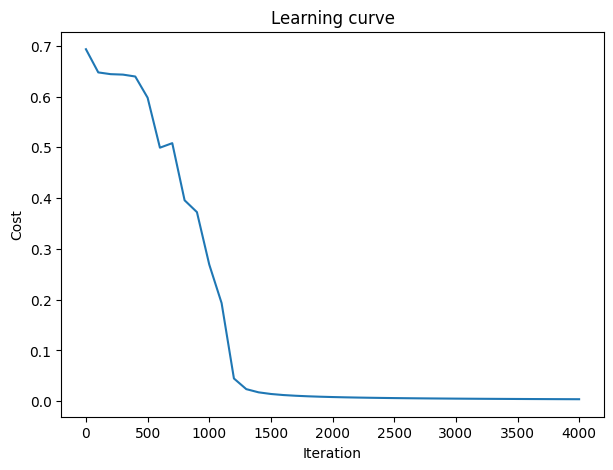

In [13]:
# Plot learning curve
plt.figure(figsize=(7,5))
plt.plot(model.learning_curve[:, 0], model.learning_curve[:, 1])
plt.ylabel('Cost')
plt.xlabel('Iteration')
plt.title('Learning curve')

The learning curve is decreasing in a manner that we would expect. After 2,500 iterations we have more or less reached and optimal set of parameters.

In [14]:
# Predict on test data
y_pred_dnn = model.predict(X_test)
y_pred_proba_dnn = model.predict_proba(X_test)

# Performace metrics
print(f'Accuracy: {accuracy_score(test_y.T, y_pred_dnn.T)}')
print(f'Logloss: {log_loss(test_y.T, y_pred_proba_dnn.T)}')
print(f'F1 score: {f1_score(test_y.T, y_pred_dnn.T)}')

Accuracy: 0.74
Logloss: 1.479411587116126
F1 score: 0.7936507936507938


Our deep neural network model is able to perform better than the logistic model. That is great!